In [ ]:
#demo usage of the library

In [462]:
import torch 
from doog.uti.make_parals import * 
import torch.nn as nn 
import matplotlib.pyplot as mtpt 

device = torch.device('mps') 

In [463]:
dom = nn.Sequential( 
    nn.Conv2d(3, 128, 4, 2, 1), 
    nn.BatchNorm2d(128), 
    nn.PReLU(), 
    nn.Conv2d(128, 6, 4, 2, 1), 
    nn.BatchNorm2d(6), 
    nn.LeakyReLU(), 
).to(device) 

In [464]:
def parse_out(n): 
    return torch.flatten(n).sum() 
def parse_in(n): 
    z = n.sum() + 2 
    return z 

In [465]:
epos = range(200) 
optim = torch.optim.Adam(dom.parameters(), .1) 

In [466]:
loss_progress = [] 

In [467]:
for epo in epos: 
    dat = torch.randint(0, 10, (1, 3, 10, 10)).float() 
    split = chanpanzee(dom, dat, (2, 1), False, ['mps', 'cpu']) 
    modI, modII = split[0] 
    datI, datII = split[1] 
    datI, datII = datI.float(), datII.float() 
    targ = parse_in(dat).to(device) 
    optim.zero_grad() 
    out = parse_out(modI(datI)) + parse_out(modII(datII)) 
    lof = nn.MSELoss() 
    lo = lof(out, targ) 
    lo.backward() 
    optim.step() 
    loss_progress.append(lo.detach().cpu().numpy()) 
    if epo % 99 == 0 and not epo == 0: 
        print(f'epo-{epo}') 
        print(out, targ)

epo-99
tensor(11.0767, device='mps:0', grad_fn=<AddBackward0>) tensor(1354., device='mps:0')
epo-198
tensor(10.2882, device='mps:0', grad_fn=<AddBackward0>) tensor(1388., device='mps:0')


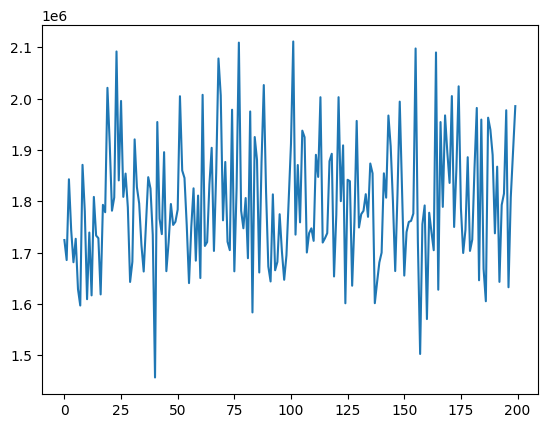

In [468]:
mtpt.plot(loss_progress) 